In [55]:
# Make Predictions with k-nearest neighbors on the Iris Flowers Dataset
from csv import reader
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("./iris.csv")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
# convert df columns execpt the last one to float
df.iloc[:, :-1] = df.iloc[:, :-1].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [59]:
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [60]:
# Find min & max x values for each column and save it to numpy array
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset.iloc[0, :])):
		col_values = [row[i] for row in dataset.values]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax

minmax = dataset_minmax(df)
print(minmax)


[[4.3, 7.9], [2.0, 4.4], [1.0, 6.9], [0.1, 2.5], ['Iris-setosa', 'Iris-virginica']]


In [61]:
# Rescale dataframe except the last columns to the range 0-1 using apply function
def normalize_dataset(dataset, minmax):
    df_temp = dataset.copy()
    df_temp.iloc[:, :-1] = df_temp.iloc[:, :-1].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    # Add the last column to the rescaled dataframe
    return df_temp

df_norm = normalize_dataset(df, minmax)
df_norm

,5.1,3.5,1.4,0.2,Iris-setosa
0,0.166667,0.416667,0.067797,0.041667,Iris-setosa
1,0.111111,0.500000,0.050847,0.041667,Iris-setosa
2,0.083333,0.458333,0.084746,0.041667,Iris-setosa
3,0.194444,0.666667,0.067797,0.041667,Iris-setosa
4,0.305556,0.791667,0.118644,0.125000,Iris-setosa
...,...,...,...,...,...
144,0.666667,0.416667,0.711864,0.916667,Iris-virginica
145,0.555556,0.208333,0.677966,0.750000,Iris-virginica
146,0.611111,0.416667,0.711864,0.791667,Iris-virginica
147,0.527778,0.583333,0.745763,0.916667,Iris-virginica


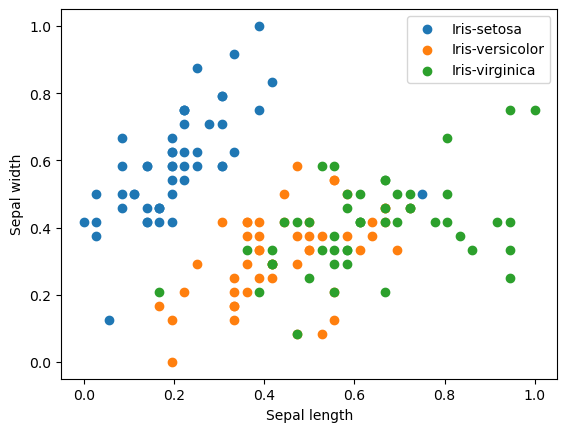

In [62]:
# create chart for 3 classes of df_norm
plt.scatter(df_norm.iloc[:50, 0], df_norm.iloc[:50, 1], label='Iris-setosa')
plt.scatter(df_norm.iloc[50:100, 0], df_norm.iloc[50:100, 1], label='Iris-versicolor')
plt.scatter(df_norm.iloc[100:, 0], df_norm.iloc[100:, 1], label='Iris-virginica')
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


In [63]:
def plot_iris_knn():
    iris = df_norm.copy()
    X = iris.iloc[:, :2]  # we only take the first two features.
    y = iris.iloc[:, -1]

    print(y)

    x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
    y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1

    row = [5.7,2.9,4.2,1.3]

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    print(np.c_[xx.ravel(), yy.ravel()])
    Z = predict_classification(df_norm, row, 3)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')
    
plot_iris_knn()

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Iris-setosa, Length: 149, dtype: object
[[-0.1        -0.1       ]
 [-0.08787879 -0.1       ]
 [-0.07575758 -0.1       ]
 ...
 [ 1.07575758  1.1       ]
 [ 1.08787879  1.1       ]
 [ 1.1         1.1       ]]


TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [64]:
# Calculate the Euclidean distance between two vectors and return it as numpy array
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


In [65]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [66]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [67]:
# predict the label
# define model parameter
num_neighbors = 5
# define a new record


label = predict_classification(df_norm, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [12]:







# Make a prediction with KNN on Iris Dataset
filename = 'iris.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# define model parameter
num_neighbors = 5
# define a new record
row = [5.7,2.9,4.2,1.3]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

NameError: name 'load_csv' is not defined